# Phase Estimation Algorithm Tests

This Python notebook provides some practical tests and visualizations of the Phase Estimation algorithm. All tests have been executed on the **OpenQASM Simulator** (https://sooluthomas.github.io/testTranslation/terra/executing_quantum_programs.html#executing-quantum-programs) offered by **Qiskit** (https://qiskit.org/), but any other backend (simulator or real quantum machine) can be used to run these tests.

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

from matplotlib import pyplot as plt
%matplotlib inline

import math

import numpy as np
from scipy.stats import ortho_group

from random import random

import re

from custom_gates import *
from custom_qft import *

from num_base_converter import *

from IPython.display import Markdown as md

Custom implementation of the $\text{QFT}$ and $\text{QFT}^{-1}$ gates.

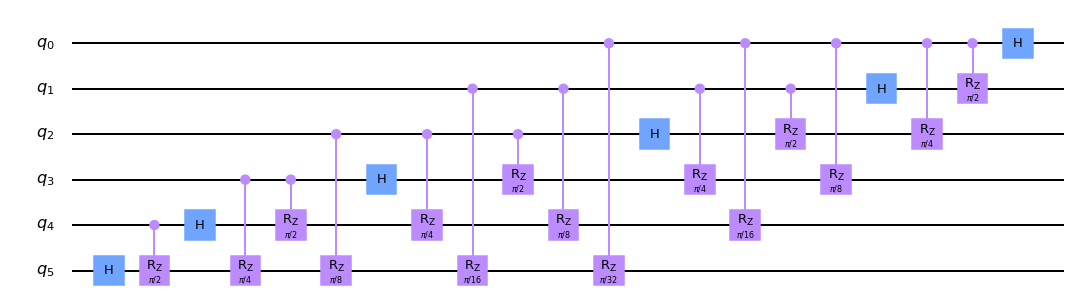

In [2]:
QFT_circuit(6).draw(output = "mpl")

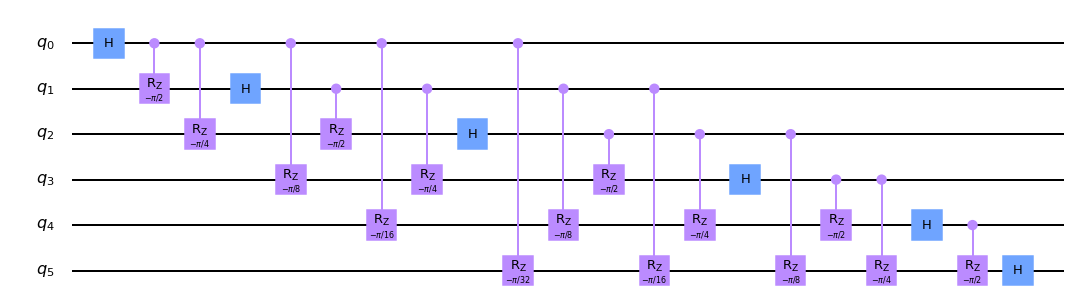

In [3]:
QFT_inv_circuit(6).draw(output = "mpl")

Test of the $\text{QFT}^{-1}$ gate with $\omega = \frac{212}{256} = 0.11010100_{2}$. The number of bits $n$ and the phase $\omega$ can be toggled to see how the results change.

The $H$ gates and the $R_n(2\pi \omega)$ gate previously applied create a state with encoded phase $e^{2 \pi i \omega}$.

In [4]:
n = 8
omega = 212/256

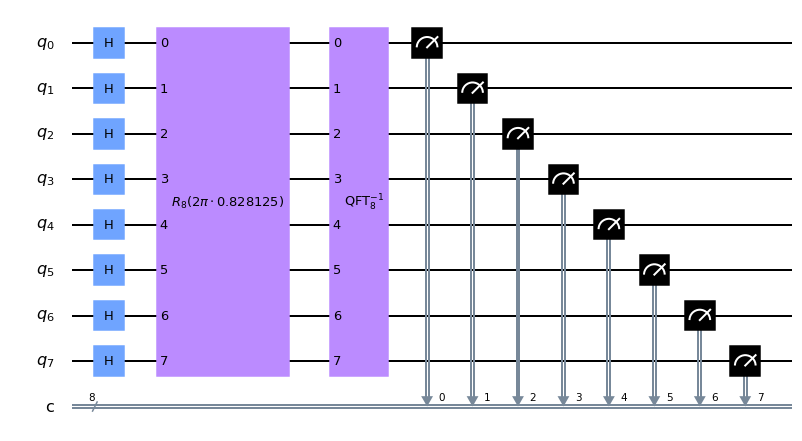

In [5]:
qc = QuantumCircuit()

qr = QuantumRegister(n, "q")
cr = ClassicalRegister(n, "c")
qc.add_register(qr)
qc.add_register(cr)

qc.h(qr)
qc.append(UG_circuit(n, 2 * math.pi * omega).to_gate(label = "$R_{%d}(2 \\pi \\cdot %f)$"%(n, omega)), qr)
qc.append(QFT_inv_circuit(n).to_gate(label = "$\\mathrm{QFT}_{%d}^{-1}$"%(n)), qr)
qc.measure(qr, cr)

qc.draw(output = "mpl")

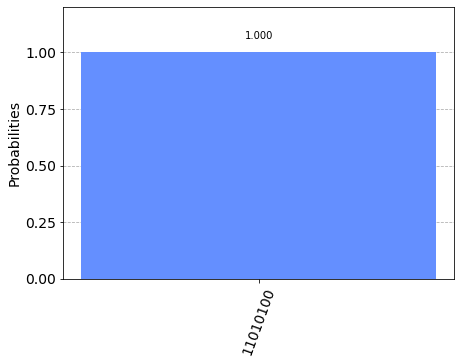

In [6]:
num_shots = 100000
job = execute(qc, Aer.get_backend("qasm_simulator"), shots = num_shots)
counts = job.result().get_counts()
plot_histogram(counts)

The obtained final result is:

In [7]:
prob = max(counts.values())
prob_str = list(filter(lambda i: i[1] == prob, counts.items()))[0][0]

print("Probability: {0:2.2f}%".format(100*round(prob/num_shots, 4)))
print("Most probable string: {0:s}".format(prob_str))
print("Exact phase: {0:f}".format(omega))
print("Approximate phase: {0:f}".format(bin_abs_to_dec(prob_str)/2**n))

Probability: 100.00%
Most probable string: 11010100
Exact phase: 0.828125
Approximate phase: 0.828125


When the phase $\omega$ has more binary digits than the number of chosen qubits, for instance, with $\omega = \frac{1337}{4096} = 0.010100111001_{2}$, we will see a distribution of answers centered on the best $n$ digit approximations of $\omega$.

In [8]:
n = 8
omega = 1337/4096

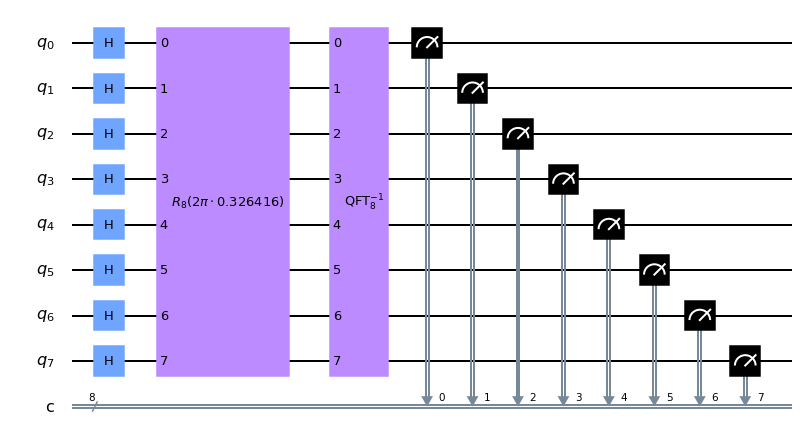

In [9]:
qc = QuantumCircuit()

qr = QuantumRegister(n, "q")
cr = ClassicalRegister(n, "c")
qc.add_register(qr)
qc.add_register(cr)

qc.h(qr)
qc.append(UG_circuit(n, 2 * math.pi * omega).to_gate(label = "$R_{%d}(2 \\pi \\cdot %f)$"%(n, omega)), qr)
qc.append(QFT_inv_circuit(n).to_gate(label = "$\\mathrm{QFT}_{%d}^{-1}$"%(n)), qr)
qc.measure(qr, cr)

qc.draw(output = "mpl")

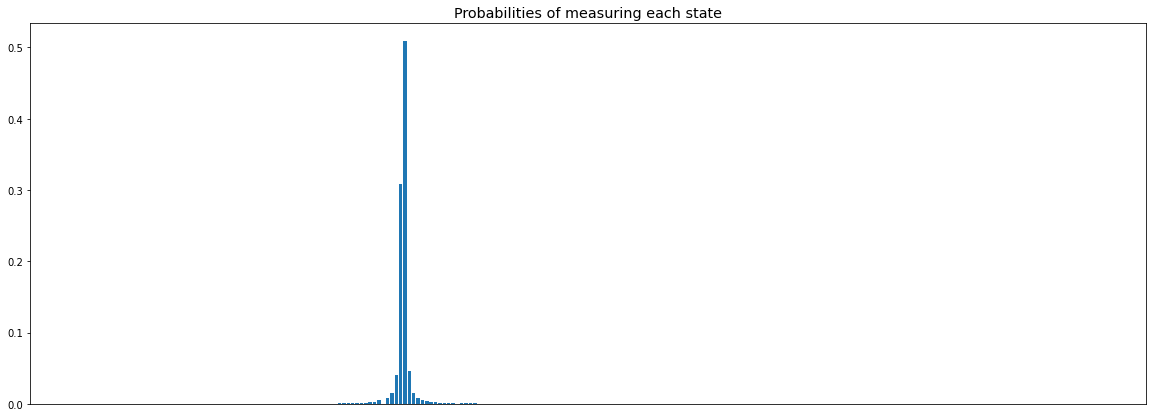

In [10]:
num_shots = 100000
job = execute(qc, Aer.get_backend("qasm_simulator"), shots = num_shots)
counts = job.result().get_counts()

vals = counts.keys()
heights = map(lambda v: v/num_shots, counts.values())
vals = list(vals)
heights = list(heights)

plt.figure(figsize=(20,7))
plt.bar(vals, heights)
plt.xticks([])
plt.title("Probabilities of measuring each state", fontsize = "x-large")
plt.show()

The most probable result in this case is:

In [11]:
prob = max(counts.values())
prob_str = list(filter(lambda i: i[1] == prob, counts.items()))[0][0]

print("Probability: {0:4.2f}%".format(100*round(prob/100000, 4)))
print("Most probable string: {0:s}".format(prob_str))
print("Exact phase: {0:f}".format(omega))
print("Approximate phase: {0:f}".format(bin_abs_to_dec(prob_str)/2**n))

Probability: 50.85%
Most probable string: 01010100
Exact phase: 0.326416
Approximate phase: 0.328125
